In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from dateutil.parser import parse
%matplotlib inline
sns.set_style('white')
import datetime


In [34]:
data = pd.read_csv("historical_data.csv")
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


### Exploratory Analysis

In [35]:
data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
market_id                                       196441 non-null float64
created_at                                      197428 non-null object
actual_delivery_time                            197421 non-null object
store_id                                        197428 non-null int64
store_primary_category                          192668 non-null object
order_protocol                                  196433 non-null float64
total_items                                     197428 non-null int64
subtotal                                        197428 non-null int64
num_distinct_items                              197428 non-null int64
min_item_price                                  197428 non-null int64
max_item_price                                  197428 non-null int64
total_onshift_dashers                           181166 non-null float64
total_busy_dashers                      

#### converting timezone to actual timezone (PST)

In [37]:


from pytz import timezone
import pytz
data["actual_delivery_time"] = data["actual_delivery_time"].apply(lambda x: pytz.timezone('UTC').localize(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")) if not pd.isna(x) else float('nan'))
data["created_at"] = data["created_at"].apply(lambda x:  pytz.timezone('UTC').localize(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")) if not pd.isna(x) else float('nan'))
data["actual_delivery_time"] = data["actual_delivery_time"].apply(lambda x : x.astimezone(timezone('US/Pacific')) if not pd.isna(x) else float('nan'))
data["created_at"] = data["created_at"].apply(lambda x : x.astimezone(timezone('US/Pacific')) if not pd.isna(x) else float('nan'))

data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 14:24:17-08:00,2015-02-06 15:27:16-08:00,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 13:49:25-08:00,2015-02-10 14:56:29-08:00,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 12:39:28-08:00,2015-01-22 13:09:09-08:00,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 13:21:45-08:00,2015-02-03 14:13:00-08:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-14 18:40:36-08:00,2015-02-14 19:20:26-08:00,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


#### Lable training data

In [38]:
data["total_time_required"] = (data["actual_delivery_time"] - data["created_at"])
data["total_time_required"] = data["total_time_required"].apply(lambda x : x.total_seconds())
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required
0,1.0,2015-02-06 14:24:17-08:00,2015-02-06 15:27:16-08:00,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 13:49:25-08:00,2015-02-10 14:56:29-08:00,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 12:39:28-08:00,2015-01-22 13:09:09-08:00,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 13:21:45-08:00,2015-02-03 14:13:00-08:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-14 18:40:36-08:00,2015-02-14 19:20:26-08:00,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [39]:
import holidays
data["day_week"] = pd.DatetimeIndex(data["actual_delivery_time"]).dayofweek
data["day"] = pd.DatetimeIndex(data["actual_delivery_time"]).day
#data["month"] = pd.DatetimeIndex(data["actual_delivery_time"]).month
data["hour_created"] = pd.DatetimeIndex(data["created_at"]).hour
#data["holiday"] = data["created_at"].apply(lambda x : 1 if x in  holidays.UnitedStates() else 0)

In [10]:

data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created
0,4.0,2015-01-25 19:23:03-08:00,2015-01-25 20:24:36-08:00,4864,indian,2.0,1,999,1,999,999,55.0,105.0,66.0,251,808.0,3693.0,6.0,25.0,19
1,4.0,2015-02-14 21:40:42-08:00,2015-02-14 22:30:20-08:00,4864,indian,2.0,3,1797,3,499,699,36.0,36.0,41.0,251,138.0,2978.0,5.0,14.0,21
2,4.0,2015-01-26 20:38:39-08:00,2015-01-26 21:26:55-08:00,4864,indian,2.0,5,3397,3,100,1299,54.0,111.0,43.0,251,195.0,2896.0,0.0,26.0,20
3,4.0,2015-02-08 19:30:32-08:00,2015-02-08 20:17:50-08:00,4864,indian,2.0,4,1847,4,100,1199,85.0,86.0,138.0,251,715.0,2838.0,6.0,8.0,19
4,4.0,2015-01-25 12:21:06-08:00,2015-01-25 13:06:15-08:00,4864,indian,2.0,4,3497,4,100,1199,54.0,102.0,57.0,251,584.0,2709.0,6.0,25.0,12


#### Hours at which order is placed clearly is important feature

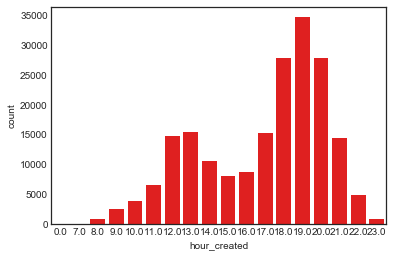

In [90]:
sns.countplot( x='hour_created' , data = data , color='red' )

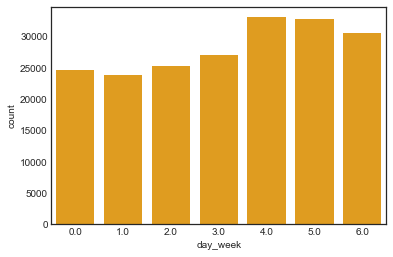

In [91]:
sns.countplot( x='day_week' , data = data , color='orange' )

#### More Orders are places during weekend from friday evening to sunday night and few during weekday lunch hour

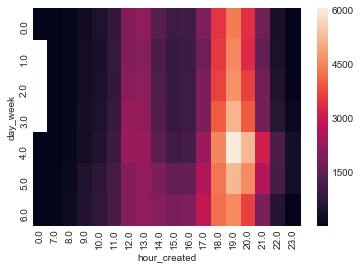

In [95]:

grpby_hour_day=data.groupby(['day_week','hour_created'])['created_at'].count().reset_index()
metric_grp_by =grpby_hour_day.pivot('day_week', 'hour_created', 'created_at')
sns.heatmap(metric_grp_by)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

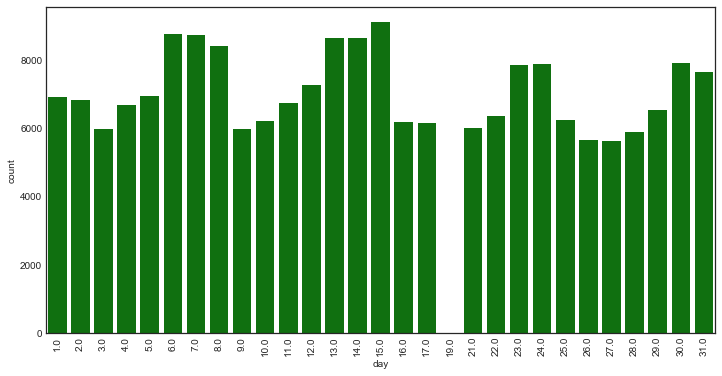

In [97]:
plt.figure(figsize=(12, 6))
sns.countplot( x='day' , data = data , color='green' )
plt.xticks(rotation='vertical')

#### why no data on 19th?

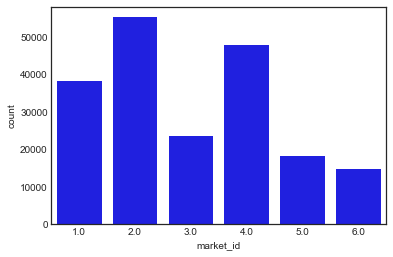

In [114]:
sns.countplot( x='market_id' , data = data , color='blue' )

In [ ]:
# Handling missing values for market_id using most common store_id in given market_id

In [41]:
from collections import defaultdict
store_dict = defaultdict(list)
market_missing = data.groupby(['store_id',"market_id"])["created_at"].count().reset_index().sort_values(by=['store_id'])
for i,row in market_missing.iterrows():
    store_dict[row["store_id"]].append((row["market_id"],row["created_at"]))


In [42]:
def fillmarketid(row):
    if row["market_id"] == "None":
        tuples = (sorted(store_dict[row["store_id"]],key=lambda elem: elem[1]))
        if len(tuples) > 0 : row["market_id"] = tuples[0][0] 
        else : row["market_id"] = 2.0    
    return row

In [43]:
data["market_id"].fillna("None",inplace=True) 
data = data.apply(lambda x : fillmarketid(x),axis=1 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

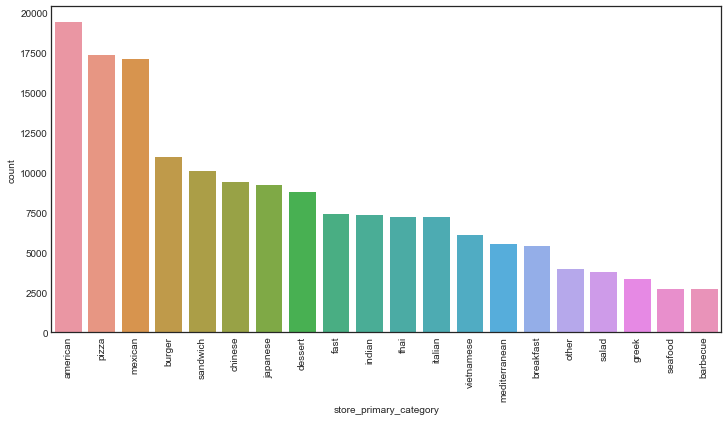

In [76]:
plt.figure(figsize=(12, 6))
groupbycat = data['store_primary_category'].value_counts().reset_index().head(20)
groupbycat.columns = ["store_primary_category",'count']
sns.barplot(x='store_primary_category',y='count',data=groupbycat)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

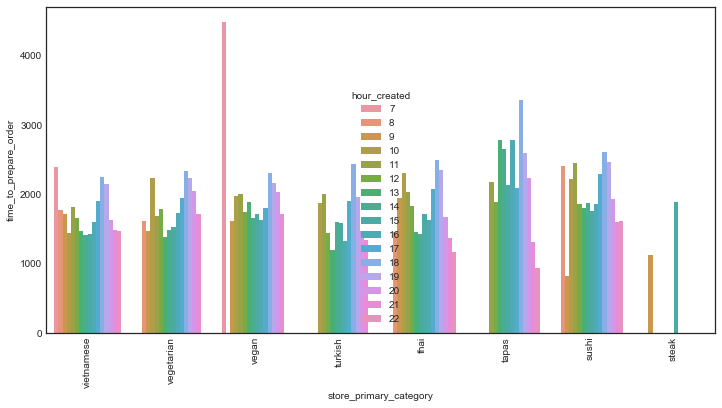

In [60]:
plt.figure(figsize=(12, 6))
timeReqperCat = data.groupby(["store_primary_category","hour_created"])["time_to_prepare_order"].mean().reset_index().sort_values(by=["store_primary_category"],ascending=False).head(100)
sns.barplot(x='store_primary_category',y='time_to_prepare_order',data=timeReqperCat,hue="hour_created")
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

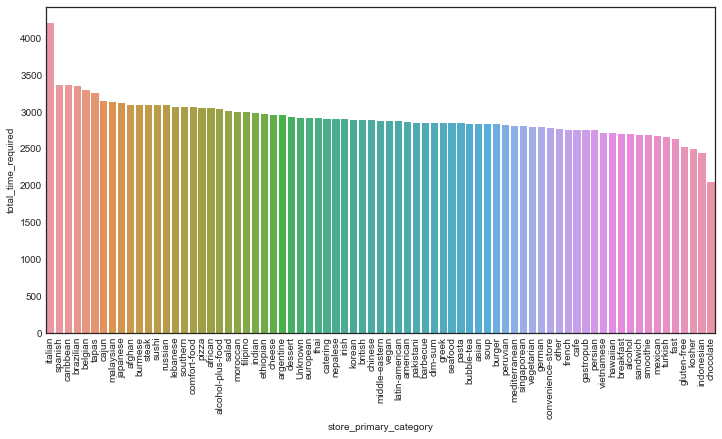

In [59]:
plt.figure(figsize=(12, 6))
timeReqperCat = data.groupby("store_primary_category")["total_time_required"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='store_primary_category',y='total_time_required',data=timeReqperCat)
plt.xticks(rotation='vertical')

#### Converting categorical data into numerical using label encoder

In [44]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['store_primary_category'].fillna("Unknown", inplace = True) 
data['store_primary_category']= label_encoder.fit_transform(data['store_primary_category']) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

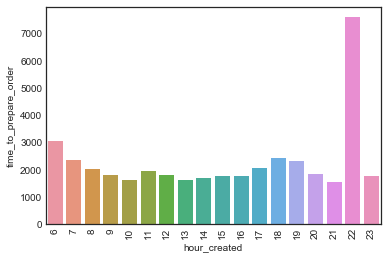

In [33]:
timeReqperhour = data[data.hour_created != 0].groupby(["hour_created"])["time_to_prepare_order"].mean().reset_index()
sns.barplot(x='hour_created',y='time_to_prepare_order',data=timeReqperhour)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

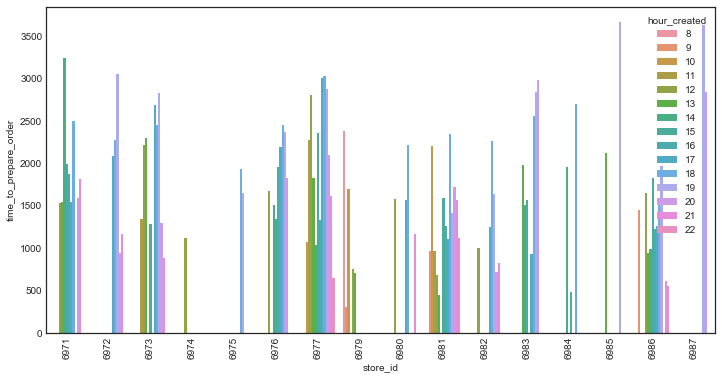

In [44]:
plt.figure(figsize=(12, 6))
timeReqperstorhour = data[(data.hour_created != 0) & ( data["time_to_prepare_order"] != 8516001.0)].groupby(["store_id","hour_created"])["time_to_prepare_order"].mean().reset_index().sort_values(by=["store_id"],ascending=False).head(100)
sns.barplot(x='store_id',y='time_to_prepare_order',data=timeReqperstorhour,hue="hour_created")
plt.xticks(rotation='vertical')

### Time required to prepare does depend upon store and time of the day

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

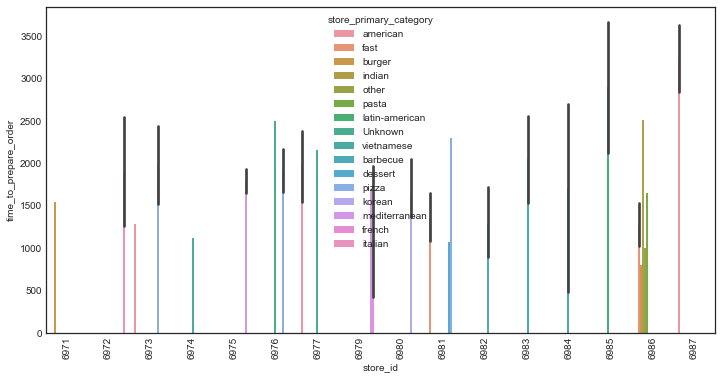

In [55]:
plt.figure(figsize=(12, 6))
timeReqperstorcat = data[(data.hour_created != 0) & ( data["time_to_prepare_order"] != 8516001.0)].groupby(["store_id","store_primary_category","hour_created"])["time_to_prepare_order"].mean().reset_index().sort_values(by=["store_id"],ascending=False).head(100)
sns.barplot(x='store_id',y='time_to_prepare_order',data=timeReqperstorcat,hue="store_primary_category")
plt.xticks(rotation='vertical')

In [46]:
data = data[data.actual_delivery_time.isna()== False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197421 entries, 0 to 197427
Data columns (total 21 columns):
market_id                                       197421 non-null float64
created_at                                      197421 non-null datetime64[ns, US/Pacific]
actual_delivery_time                            197421 non-null datetime64[ns, US/Pacific]
store_id                                        197421 non-null int64
store_primary_category                          197421 non-null int32
order_protocol                                  196426 non-null float64
total_items                                     197421 non-null int64
subtotal                                        197421 non-null int64
num_distinct_items                              197421 non-null int64
min_item_price                                  197421 non-null int64
max_item_price                                  197421 non-null int64
total_onshift_dashers                           181159 non-null float64
t

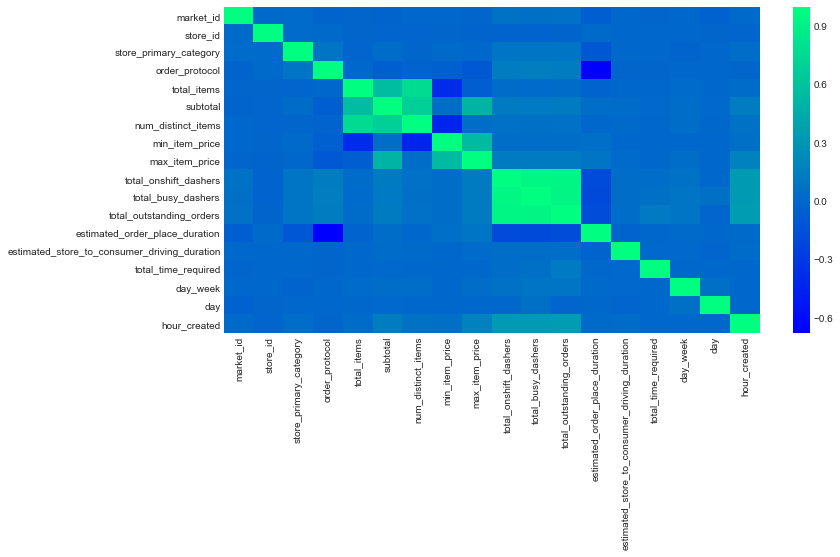

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),cmap="winter")

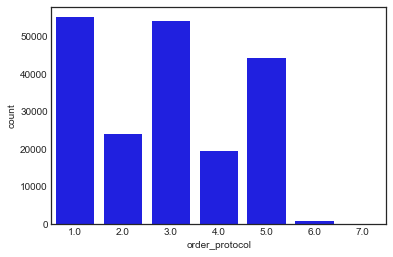

In [145]:
sns.countplot( x='order_protocol' , data = data , color='blue' )

#### handling missing values for order_protocol with 1 and 3 using estimated_order_place duration value

In [47]:
def fillorderprotocol(row):
    if row["order_protocol"] == "None":
        if row["estimated_order_place_duration"] < 300 :
            row["order_protocol"] = 3.0
        else : row["order_protocol"] = 1.0    
    return row

In [48]:
data.order_protocol.fillna("None",inplace=True)
data = data.apply(lambda x: fillorderprotocol(x),axis=1)

In [33]:
data.describe()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order
count,191174.000000,191174.000000,191174.000000,191174.000000,191174.000000,191174.000000,191174.000000,191174.000000,191174.000000,175266.000000,175266.000000,175266.000000,191174.000000,190664.000000,191174.000000,191174.000000,191174.000000,191174.000000,190664.000000
mean,2.982895,3520.782005,36.142587,2.891622,3.193274,2679.185318,2.669317,686.090174,1157.925686,44.987128,41.895758,58.273556,307.995324,545.588999,2864.856842,3.222933,15.426313,16.107007,2011.901974
std,1.527131,2057.059377,21.280687,1.502676,2.664421,1821.882747,1.629501,521.875761,557.671531,34.578482,32.179387,52.745061,89.916763,219.451661,1626.652977,1.977601,9.251286,3.304356,1603.478411
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,1683.000000,16.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2104.000000,2.000000,7.000000,13.000000,1273.000000
50%,3.000000,3564.000000,39.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000,2660.000000,3.000000,14.000000,17.000000,1801.000000
75%,4.000000,5297.000000,56.000000,4.000000,4.000000,3390.000000,3.000000,949.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,703.000000,3380.000000,5.000000,24.000000,19.000000,2498.000000
max,6.000000,6987.000000,73.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,373879.000000,6.000000,31.000000,23.000000,373152.000000


In [49]:
data.drop(["created_at","actual_delivery_time"],axis=1,inplace=True)
data = data.abs()
data.describe()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order
count,197421.000000,197421.000000,197421.00000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,181159.000000,181159.000000,181159.000000,197421.000000,196895.000000,1.974210e+05,197421.000000,197421.000000,197421.000000,1.968950e+05
mean,2.980493,3530.581397,36.65023,2.880074,3.196367,2682.326379,2.670780,686.228466,1159.590444,44.807296,41.739207,58.049338,308.560244,545.357089,2.908257e+03,3.221663,15.426920,16.109472,2.055086e+03
std,1.526476,2053.493429,21.65690,1.501694,2.666552,1823.106256,1.630261,522.038973,558.416236,34.525354,32.144618,52.658547,90.139725,219.353976,1.922961e+04,1.978420,9.254242,3.306409,1.925313e+04
min,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000e+02,0.000000,1.000000,0.000000,1.000000e+00
25%,2.000000,1686.000000,15.00000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03,2.000000,7.000000,13.000000,1.273000e+03
50%,3.000000,3592.000000,40.00000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.660000e+03,3.000000,14.000000,17.000000,1.801000e+03
75%,4.000000,5299.000000,57.00000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.381000e+03,5.000000,24.000000,19.000000,2.498000e+03
max,6.000000,6987.000000,74.00000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06,6.000000,31.000000,23.000000,8.516001e+06


### Negative Market feature values 

In [27]:
data[(data.total_busy_dashers < 0) | (data.total_onshift_dashers < 0) | (data.total_outstanding_orders < 0)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order
1749,1.0,2015-02-08 07:41:45-08:00,2015-02-08 08:35:01-08:00,6172,59,3.0,1,1514,1,1116,...,1.0,-1.0,3.0,251,650.0,3196.0,6.0,8.0,7,2295.0
6640,3.0,2015-01-21 13:02:32-08:00,2015-01-21 13:41:03-08:00,2649,19,2.0,1,986,1,892,...,-2.0,5.0,1.0,251,787.0,2311.0,2.0,21.0,13,1273.0
13190,3.0,2015-02-02 19:04:22-08:00,2015-02-02 20:21:43-08:00,275,28,4.0,3,1778,2,158,...,7.0,10.0,-2.0,251,743.0,4641.0,0.0,2.0,19,3647.0
14206,1.0,2015-01-25 13:15:30-08:00,2015-01-25 13:51:23-08:00,4237,7,1.0,3,2039,3,393,...,9.0,7.0,-1.0,446,393.0,2153.0,6.0,25.0,13,1314.0
16425,1.0,2015-02-10 11:35:28-08:00,2015-02-10 12:28:51-08:00,4906,40,1.0,2,1578,2,441,...,0.0,-1.0,9.0,446,735.0,3203.0,1.0,10.0,11,2022.0
16781,1.0,2015-02-08 11:49:17-08:00,2015-02-08 13:10:48-08:00,5572,41,1.0,2,1641,2,754,...,5.0,2.0,-1.0,446,537.0,4891.0,6.0,8.0,11,3908.0
18414,1.0,2015-01-28 21:09:24-08:00,2015-01-28 21:41:44-08:00,3264,19,3.0,1,1237,1,984,...,5.0,-1.0,7.0,251,466.0,1940.0,2.0,28.0,21,1223.0
20147,3.0,2015-02-08 10:28:15-08:00,2015-02-08 11:17:31-08:00,2772,28,3.0,2,1327,1,680,...,-1.0,6.0,6.0,251,368.0,2956.0,6.0,8.0,10,2337.0
20379,1.0,2015-02-12 19:18:12-08:00,2015-02-12 20:23:16-08:00,5266,14,1.0,6,5773,6,554,...,10.0,-1.0,6.0,446,552.0,3904.0,3.0,12.0,19,2906.0
24649,3.0,2015-02-07 11:55:46-08:00,2015-02-07 12:46:27-08:00,793,35,1.0,1,1202,1,987,...,-1.0,9.0,5.0,446,773.0,3041.0,5.0,7.0,11,1822.0


### total_onshift_dashers < total_busy_dasher ?? 

In [154]:
data[data.total_busy_dashers > data.total_onshift_dashers]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created
1,2.0,2015-02-10 13:49:25-08:00,2015-02-10 14:56:29-08:00,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1.0,10.0,14.0
7,3.0,2015-02-11 19:03:35-08:00,2015-02-11 19:36:20-08:00,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1965.0,2.0,11.0,19.0
14,1.0,2015-02-11 19:36:46-08:00,2015-02-11 20:14:39-08:00,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,2.0,11.0,20.0
18,1.0,2015-01-30 20:35:54-08:00,2015-01-30 21:47:30-08:00,2841,italian,1.0,2,3150,2,1425,1725,4.0,9.0,12.0,446,548.0,4296.0,4.0,30.0,21.0
20,1.0,2015-01-31 15:45:12-08:00,2015-01-31 16:14:05-08:00,4139,mexican,1.0,5,1285,3,150,400,12.0,13.0,11.0,446,424.0,1733.0,5.0,31.0,16.0
23,1.0,2015-02-01 21:27:49-08:00,2015-02-01 23:05:09-08:00,5058,italian,1.0,7,14900,5,1200,3900,8.0,11.0,11.0,446,901.0,5840.0,6.0,1.0,23.0
27,1.0,2015-02-09 20:36:39-08:00,2015-02-09 21:20:37-08:00,5058,italian,1.0,4,5800,4,700,2000,13.0,16.0,27.0,446,344.0,2638.0,0.0,9.0,21.0
33,1.0,2015-02-12 12:27:42-08:00,2015-02-12 13:18:29-08:00,4149,NaN,2.0,1,975,1,975,975,24.0,25.0,30.0,251,487.0,3047.0,3.0,12.0,13.0
53,3.0,2015-01-31 20:39:28-08:00,2015-01-31 21:08:39-08:00,2004,american,5.0,4,3500,4,600,1200,20.0,29.0,33.0,251,887.0,1751.0,5.0,31.0,21.0
58,3.0,2015-01-23 13:06:30-08:00,2015-01-23 13:41:57-08:00,2004,american,5.0,2,2800,2,1000,1800,21.0,23.0,24.0,251,828.0,2127.0,4.0,23.0,13.0


In [57]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(data.values)

In [58]:
df = pd.DataFrame(imputed_training)
df.columns = data.columns
df.describe()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order
count,197421.000000,197421.000000,197421.00000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,1.974210e+05,197421.000000,197421.000000,197421.000000,1.974210e+05
mean,2.980493,3530.581397,36.65023,2.880074,3.196367,2682.326379,2.670780,686.228466,1159.590444,44.965870,41.834789,58.359701,308.560244,545.357008,2.908257e+03,3.221663,15.426920,16.109472,2.054471e+03
std,1.526476,2053.493429,21.65690,1.501694,2.666552,1823.106256,1.630261,522.038973,558.416236,33.102644,31.594925,69.549016,90.139725,219.061562,1.922961e+04,1.978420,9.254242,3.306409,1.922753e+04
min,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000e+02,0.000000,1.000000,0.000000,1.000000e+00
25%,2.000000,1686.000000,15.00000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,19.000000,251.000000,383.000000,2.104000e+03,2.000000,7.000000,13.000000,1.273000e+03
50%,3.000000,3592.000000,40.00000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,40.000000,38.000000,47.000000,251.000000,544.000000,2.660000e+03,3.000000,14.000000,17.000000,1.800000e+03
75%,4.000000,5299.000000,57.00000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000,446.000000,702.000000,3.381000e+03,5.000000,24.000000,19.000000,2.497000e+03
max,6.000000,6987.000000,74.00000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,3140.641216,21315.136698,2715.000000,2088.000000,8.516859e+06,6.000000,31.000000,23.000000,8.516001e+06


In [179]:
data.describe()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,holiday
count,196895.000000,196895.000000,196895.000000,196895.000000,196895.000000,196895.000000,196895.000000,196895.000000,196895.000000,180677.000000,180677.000000,180677.000000,196895.000000,196895.000000,1.968950e+05,196895.000000,196895.000000,196895.000000,196895.000000
mean,2.980568,3530.359273,36.646573,2.880144,3.196785,2682.901480,2.671236,686.244166,1159.848889,44.820824,41.755315,58.072190,308.580314,545.357089,2.908892e+03,3.222941,15.393702,16.118530,0.031336
std,1.526565,2053.494035,21.656220,1.501870,2.666844,1822.767196,1.630356,522.007149,558.466739,34.540923,32.158649,52.682361,90.151787,219.353976,1.925521e+04,1.980693,9.242085,3.302649,0.174226
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.010000e+02,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1686.000000,15.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03,2.000000,7.000000,13.000000,0.000000
50%,3.000000,3591.000000,40.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.661000e+03,3.000000,14.000000,17.000000,0.000000
75%,4.000000,5299.000000,57.000000,4.000000,4.000000,3396.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.382000e+03,5.000000,24.000000,19.000000,0.000000
max,6.000000,6987.000000,74.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06,6.000000,31.000000,23.000000,1.000000


In [182]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df.drop([],axis=1)))

Top Absolute Correlations
total_onshift_dashers     total_busy_dashers                0.922315
total_items               num_distinct_items                0.763801
total_busy_dashers        total_outstanding_orders          0.717133
subtotal                  num_distinct_items                0.681148
order_protocol            estimated_order_place_duration    0.678909
total_items               subtotal                          0.557836
total_onshift_dashers     total_outstanding_orders          0.555869
min_item_price            max_item_price                    0.545117
subtotal                  max_item_price                    0.505759
total_outstanding_orders  total_time_required               0.473506
dtype: float64


In [4]:

# For each feature find the data points with extreme high or low values
outliers = []
from collections import Counter
for feature in df.drop(["time_to_prepare_order","avg_time_to_prepare_cat_hour","store_id","store_primary_category","total_items"],axis=1).keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    all_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]    
# OPTIONAL: Select the indices for data points you wish to remove
    outliers =outliers + all_outliers.index.tolist()


# Remove the outliers, if any were specified
o = Counter(outliers)
good_data = df.drop(df.index[[int(i[0]) for i in o.most_common(1000)]]).reset_index(drop = True)
outlier = [int(i[0]) for i in o.most_common(5)]
outlier

Data points considered outliers for the feature 'market_id':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour


Data points considered outliers for the feature 'order_protocol':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour


Data points considered outliers for the feature 'subtotal':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
1,3,2004,5,5,7,9000,7,600,2400,15.000000,...,11.000000,251,679.0,1899,0,26,14,969.0,1617.500000,1639.855530
35,3,90,5,1,4,6410,3,1095,2350,0.000000,...,0.000000,446,570.0,2702,3,5,14,1686.0,2145.500000,1639.855530
240,1,3158,5,4,2,7898,1,3949,3949,0.000000,...,0.000000,251,1078.0,4909,2,21,14,3580.0,3265.000000,1639.855530
320,2,6209,5,5,14,9405,9,375,1095,30.000000,...,44.000000,251,913.0,2813,5,14,14,1649.0,1645.421053,1639.855530
360,3,3020,5,1,5,8200,5,600,2100,2.000000,...,1.000000,446,940.0,4363,4,23,14,2977.0,2977.000000,1639.855530
395,4,6774,5,3,5,6725,5,1000,1750,24.000000,...,21.000000,251,742.0,2740,1,17,14,1747.0,1548.285714,1639.855530
397,4,6774,5,3,6,8100,5,800,2300,36.000000,...,32.000000,251,545.0,2292,5,7,14,1496.0,1548.285714,1639.855530
607,2,1076,5,3,6,6490,5,675,1595,31.000000,...,30.000000,251,791.0,3010,3,29,14,1968.0,2034.894737,1639.855530
610,1,1550,5,3,11,13700,10,875,1700,18.000000,...,10.000000,251,356.0,2832,2,11,14,2225.0,2225.000000,1639.855530
783,3,1326,5,5,1,7422,1,7259,7210,31.000000,...,29.000000,251,682.0,2941,6,15,14,2008.0,1668.333333,1639.855530


Data points considered outliers for the feature 'num_distinct_items':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
1,3,2004,5,5,7,9000,7,600,2400,15.000000,...,11.000000,251,679.000000,1899,0,26,14,969.000000,1617.500000,1639.855530
173,2,5542,5,1,7,4156,7,279,1099,21.000000,...,32.000000,446,1075.000000,2630,2,4,14,1109.000000,1298.250000,1639.855530
282,6,3443,5,5,7,5085,7,460,1600,47.127889,...,55.414836,251,728.000000,1522,5,24,14,543.000000,1378.260870,1639.855530
320,2,6209,5,5,14,9405,9,375,1095,30.000000,...,44.000000,251,913.000000,2813,5,14,14,1649.000000,1645.421053,1639.855530
610,1,1550,5,3,11,13700,10,875,1700,18.000000,...,10.000000,251,356.000000,2832,2,11,14,2225.000000,2225.000000,1639.855530
813,3,484,5,5,7,3850,7,275,1065,4.000000,...,5.000000,251,1077.000000,3876,6,25,14,2548.000000,2325.750000,1639.855530
832,2,2069,5,3,8,3254,7,79,999,62.000000,...,59.000000,251,460.000000,2283,5,31,14,1572.000000,1422.000000,1639.855530
989,1,4845,48,5,7,2525,7,100,575,22.000000,...,29.000000,251,648.000000,3350,5,24,13,2451.000000,1920.333333,1449.642941
1058,1,4700,48,1,7,4298,7,271,1216,19.000000,...,8.000000,446,1169.000000,3125,4,13,13,1510.000000,1350.000000,1449.642941
1064,6,6430,48,3,9,3740,8,150,750,44.080350,...,56.143714,251,671.000000,2957,5,31,13,2035.000000,1160.571429,1449.642941


Data points considered outliers for the feature 'min_item_price':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
7,5,5547,5,1,1,3759,1,3759,3759,10.000000,...,15.000000,446,537.0,2613,6,25,14,1630.0,1907.333333,1639.855530
18,3,4818,5,1,1,3749,1,3749,3749,19.000000,...,23.000000,446,888.0,2727,6,15,14,1393.0,1393.000000,1639.855530
69,2,3486,5,1,1,3506,1,3100,3115,61.000000,...,61.000000,446,555.0,2471,5,31,14,1470.0,2229.703704,1639.855530
72,3,4557,5,2,2,4398,2,2199,2199,13.000000,...,13.000000,251,596.0,3554,6,25,14,2707.0,2229.000000,1639.855530
89,2,1311,5,3,1,4039,1,3899,3899,57.000000,...,74.000000,251,895.0,2263,5,14,14,1117.0,1724.109091,1639.855530
114,2,1311,5,3,1,3029,1,3029,3029,44.000000,...,58.000000,251,1057.0,2599,5,24,14,1291.0,1724.109091,1639.855530
122,2,1311,5,3,1,3699,1,3699,3699,67.000000,...,59.000000,251,783.0,3467,6,8,14,2433.0,1724.109091,1639.855530
135,3,1032,5,3,1,3348,1,2499,2499,4.000000,...,0.000000,251,398.0,2470,5,14,14,1821.0,1821.000000,1639.855530
157,3,89,5,1,2,4278,1,2139,2139,24.000000,...,14.000000,446,796.0,3868,6,25,14,2626.0,3447.000000,1639.855530
161,2,5111,5,3,1,2095,1,2095,2095,19.000000,...,18.000000,251,710.0,2061,3,29,14,1100.0,1137.000000,1639.855530


Data points considered outliers for the feature 'max_item_price':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
1,3,2004,5,5,7,9000,7,600,2400,15.000000,...,11.000000,251,679.0,1899,0,26,14,969.0,1617.500000,1639.855530
7,5,5547,5,1,1,3759,1,3759,3759,10.000000,...,15.000000,446,537.0,2613,6,25,14,1630.0,1907.333333,1639.855530
18,3,4818,5,1,1,3749,1,3749,3749,19.000000,...,23.000000,446,888.0,2727,6,15,14,1393.0,1393.000000,1639.855530
35,3,90,5,1,4,6410,3,1095,2350,0.000000,...,0.000000,446,570.0,2702,3,5,14,1686.0,2145.500000,1639.855530
46,2,3486,5,1,5,3035,4,89,2419,49.000000,...,60.000000,446,531.0,3944,5,24,14,2967.0,2229.703704,1639.855530
69,2,3486,5,1,1,3506,1,3100,3115,61.000000,...,61.000000,446,555.0,2471,5,31,14,1470.0,2229.703704,1639.855530
89,2,1311,5,3,1,4039,1,3899,3899,57.000000,...,74.000000,251,895.0,2263,5,14,14,1117.0,1724.109091,1639.855530
91,2,1311,5,3,2,4779,2,391,4248,36.000000,...,58.000000,251,658.0,3044,0,2,14,2135.0,1724.109091,1639.855530
92,2,1311,5,3,4,3106,2,229,2419,41.000000,...,59.000000,251,477.0,2002,5,24,14,1274.0,1724.109091,1639.855530
109,2,1311,5,3,2,3668,2,166,3028,36.000000,...,56.000000,251,692.0,2595,4,6,14,1652.0,1724.109091,1639.855530


Data points considered outliers for the feature 'total_onshift_dashers':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
2535,2,2137,0,2,2,950,2,450,500,130.0,...,222.0,251,589.0,3999,4,23,18,3159.0,2636.000000,2327.951460
2537,2,2137,0,2,2,1075,2,400,525,154.0,...,199.0,251,761.0,2962,4,6,18,1950.0,2636.000000,2327.951460
2538,2,2137,0,2,2,800,2,400,400,147.0,...,134.0,251,707.0,2487,3,5,18,1529.0,2636.000000,2327.951460
2539,1,1955,0,2,4,2247,4,399,650,131.0,...,226.0,251,549.0,4998,6,15,18,4198.0,3638.000000,2327.951460
2577,2,459,0,5,2,2600,2,1100,1500,144.0,...,175.0,251,521.0,3532,4,13,18,2760.0,2365.544444,2327.951460
2596,2,1128,0,3,1,2500,1,2150,2150,132.0,...,201.0,251,842.0,3517,4,13,18,2424.0,2867.384615,2327.951460
2603,2,1128,0,3,3,9000,2,2650,2650,139.0,...,159.0,251,732.0,4215,4,6,18,3232.0,2867.384615,2327.951460
2606,2,1128,0,3,12,7650,4,375,800,140.0,...,168.0,251,755.0,4631,4,6,18,3625.0,2867.384615,2327.951460
2619,4,6868,0,5,1,1995,1,895,895,132.0,...,162.0,251,805.0,4029,4,6,18,2973.0,2305.071429,2327.951460
2653,5,4132,0,2,3,2497,3,399,999,151.0,...,214.0,251,559.0,3250,4,6,18,2440.0,1866.846154,2327.951460


Data points considered outliers for the feature 'total_busy_dashers':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
2529,2,2547,0,3,4,7800,4,1500,1800,106.0,...,156.0,251,448.0,2999,5,24,18,2300.0,2007.287539,2327.951460
2533,1,4864,0,3,2,1330,2,163,1128,116.0,...,135.0,251,1003.0,4689,5,24,18,3435.0,2586.869565,2327.951460
2535,2,2137,0,2,2,950,2,450,500,130.0,...,222.0,251,589.0,3999,4,23,18,3159.0,2636.000000,2327.951460
2537,2,2137,0,2,2,1075,2,400,525,154.0,...,199.0,251,761.0,2962,4,6,18,1950.0,2636.000000,2327.951460
2539,1,1955,0,2,4,2247,4,399,650,131.0,...,226.0,251,549.0,4998,6,15,18,4198.0,3638.000000,2327.951460
2699,5,4273,0,3,1,2400,1,2400,2400,75.0,...,104.0,251,754.0,3946,0,26,18,2941.0,2304.714286,2327.951460
2736,2,5736,0,1,3,1145,3,250,350,127.0,...,217.0,446,806.0,4489,6,15,18,3237.0,2494.000000,2327.951460
2952,2,126,0,2,1,1295,1,1295,1295,148.0,...,225.0,251,268.0,2220,4,13,18,1701.0,2007.428571,2327.951460
2993,3,1296,0,3,7,5095,6,150,1265,154.0,...,199.0,251,532.0,3149,4,6,18,2366.0,2438.218391,2327.951460
3002,2,5861,0,1,13,7051,9,186,1312,104.0,...,156.0,446,783.0,4909,5,24,18,3680.0,2346.909091,2327.951460


Data points considered outliers for the feature 'total_outstanding_orders':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
2535,2,2137,0,2,2,950,2,450,500,130.0,...,222.0,251,589.0,3999,4,23,18,3159.0,2636.000000,2327.951460
2536,2,2137,0,2,1,475,1,400,400,123.0,...,217.0,251,525.0,4682,4,30,18,3906.0,2636.000000,2327.951460
2537,2,2137,0,2,2,1075,2,400,525,154.0,...,199.0,251,761.0,2962,4,6,18,1950.0,2636.000000,2327.951460
2539,1,1955,0,2,4,2247,4,399,650,131.0,...,226.0,251,549.0,4998,6,15,18,4198.0,3638.000000,2327.951460
2541,2,1955,0,2,5,2594,4,299,600,125.0,...,198.0,251,478.0,4897,5,14,18,4168.0,3638.000000,2327.951460
2542,4,5960,0,5,2,2595,2,900,1695,97.0,...,180.0,251,128.0,2288,6,8,18,1909.0,2239.000000,2327.951460
2555,2,6865,0,3,2,1398,1,699,699,112.0,...,182.0,251,390.0,2099,5,31,18,1458.0,1714.584746,2327.951460
2577,2,459,0,5,2,2600,2,1100,1500,144.0,...,175.0,251,521.0,3532,4,13,18,2760.0,2365.544444,2327.951460
2580,6,326,0,2,2,2050,2,600,1450,123.0,...,195.0,251,337.0,4229,3,29,18,3641.0,2888.980392,2327.951460
2596,2,1128,0,3,1,2500,1,2150,2150,132.0,...,201.0,251,842.0,3517,4,13,18,2424.0,2867.384615,2327.951460


Data points considered outliers for the feature 'estimated_order_place_duration':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
1403,3,1289,48,1,4,726,4,89,359,2.0,...,5.0,1740,163.0,2237,2,4,13,334.0,334.000000,1449.642941
3123,2,785,0,1,3,3601,3,772,1859,46.0,...,83.0,1431,880.0,4562,0,9,18,2251.0,2527.187500,2327.951460
4909,4,3755,0,3,1,1100,1,1100,1100,51.0,...,113.0,1740,726.0,5237,3,22,11,2771.0,2518.666667,1899.074540
6842,2,2794,40,3,2,4598,2,2199,2399,77.0,...,114.0,1299,670.0,3025,2,21,18,1056.0,2661.424242,2352.881176
10674,4,836,48,3,3,3044,3,599,1250,96.0,...,165.0,1091,698.0,3962,2,21,18,2173.0,2147.090909,2085.833134
13832,2,4688,40,3,6,7797,4,0,2399,67.0,...,66.0,1012,770.0,4405,3,12,17,2623.0,1998.424242,2055.523050
67171,4,4986,21,5,3,4200,3,1000,1800,102.0,...,163.0,795,649.0,3442,4,6,17,1998.0,2382.400000,1916.786632
67264,4,2496,21,1,6,5470,6,595,1195,102.0,...,163.0,851,589.0,3085,4,6,17,1645.0,2008.333333,1916.786632
85871,4,2341,37,5,3,2980,2,953,1171,99.0,...,172.0,921,437.0,3813,2,21,18,2455.0,2071.875000,2323.914399
86204,4,5545,37,3,3,3440,3,695,1995,97.0,...,167.0,1623,425.0,3461,2,21,18,1413.0,2393.774194,2323.914399


Data points considered outliers for the feature 'estimated_store_to_consumer_driving_duration':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
207,1,4104,5,1,5,4129,4,295,1395,11.000000,...,12.000000,446,1210.0,3223,1,27,14,1567.0,1281.500000,1639.855530
692,5,2388,5,1,2,1738,2,209,1479,23.000000,...,29.000000,446,1245.0,4691,6,8,14,3000.0,2350.000000,1639.855530
2534,1,4703,0,3,3,3285,3,1095,1095,49.000000,...,69.000000,251,1453.0,4854,5,24,18,3150.0,2004.214286,2327.951460
2825,6,2259,0,1,4,3435,4,595,995,46.832109,...,59.505101,446,1359.0,3861,6,25,18,2056.0,2464.333333,2327.951460
4487,1,1582,0,1,8,7092,5,699,1299,46.000000,...,48.000000,446,1255.0,3433,4,23,17,1732.0,1538.285714,1901.976672
5724,3,3480,40,1,4,3880,2,595,1095,5.000000,...,9.000000,446,1206.0,3157,5,7,19,1505.0,1399.500000,2216.909548
6111,1,2263,40,5,2,3050,2,1350,1700,49.000000,...,78.000000,251,1399.0,3168,3,12,19,1518.0,2324.714286,2216.909548
6789,5,6523,40,1,4,4450,4,550,1650,49.000000,...,78.000000,446,1285.0,4169,4,13,18,2438.0,2438.000000,2352.881176
7043,2,874,40,3,4,8170,4,595,2725,39.000000,...,61.000000,251,1315.0,4720,0,16,18,3154.0,2768.370787,2352.881176
7378,6,3789,40,1,3,4640,3,595,1495,47.359681,...,60.692701,446,1212.0,4011,1,10,18,2353.0,2785.142857,2352.881176


Data points considered outliers for the feature 'total_time_required':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
158,3,89,5,1,2,2298,2,1029,1269,14.000000,...,17.000000,446,521.0,5235,6,25,14,4268.0,3447.000000,1639.855530
238,1,5615,5,1,2,1750,2,0,1612,2.000000,...,3.000000,446,475.0,5115,6,25,14,4194.0,4194.000000,1639.855530
593,5,1410,5,4,4,1555,4,110,960,15.000000,...,31.000000,251,479.0,5100,0,2,14,4370.0,2681.750000,1639.855530
730,3,6771,5,1,5,4485,5,0,1299,3.000000,...,1.000000,446,643.0,5110,6,1,14,4021.0,3286.500000,1639.855530
775,1,5927,5,1,3,3185,3,735,1025,0.000000,...,9.000000,446,741.0,5111,6,1,14,3924.0,2893.000000,1639.855530
1460,3,4758,48,2,21,8016,3,200,748,0.000000,...,0.000000,251,803.0,5225,0,2,13,4171.0,4171.000000,1449.642941
1496,4,3776,48,1,6,900,2,150,150,37.000000,...,31.000000,446,762.0,5286,6,15,13,4078.0,2997.333333,1449.642941
1581,1,2419,48,1,2,2590,2,1095,1495,8.000000,...,10.000000,446,406.0,5161,6,1,13,4309.0,4309.000000,1449.642941
1788,2,1686,48,5,9,3719,6,50,799,58.000000,...,64.000000,251,703.0,5275,5,31,13,4321.0,1437.657895,1449.642941
2014,3,3634,0,1,2,2100,2,1000,1100,20.000000,...,17.000000,446,799.0,5127,4,13,13,3882.0,2571.666667,1633.072202


Data points considered outliers for the feature 'day_week':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour


Data points considered outliers for the feature 'day':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour


Data points considered outliers for the feature 'hour_created':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour


Data points considered outliers for the feature 'avg_time_to_prepare_store_hour':


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
32,3,4534,5,1,4,3566,4,736,1396,8.000000,...,2.000000,446,565.0,4797,0,2,14,3786.0,3786.000000,1639.855530
157,3,89,5,1,2,4278,1,2139,2139,24.000000,...,14.000000,446,796.0,3868,6,25,14,2626.0,3447.000000,1639.855530
158,3,89,5,1,2,2298,2,1029,1269,14.000000,...,17.000000,446,521.0,5235,6,25,14,4268.0,3447.000000,1639.855530
217,1,5831,5,1,2,1650,2,500,1150,9.000000,...,9.000000,446,727.0,4892,6,1,14,3719.0,3719.000000,1639.855530
238,1,5615,5,1,2,1750,2,0,1612,2.000000,...,3.000000,446,475.0,5115,6,25,14,4194.0,4194.000000,1639.855530
367,1,931,5,4,1,1496,1,999,999,10.000000,...,6.000000,446,871.0,1722,0,26,14,405.0,405.000000,1639.855530
546,1,4366,5,1,3,2905,3,225,1490,22.000000,...,24.000000,446,150.0,951,6,15,14,355.0,355.000000,1639.855530
702,4,6419,5,3,4,890,3,150,495,25.000000,...,55.000000,251,212.0,4399,0,2,14,3936.0,3936.000000,1639.855530
727,3,5305,5,1,3,2785,1,895,895,37.916904,...,54.030356,446,585.0,4461,0,2,14,3430.0,3430.000000,1639.855530
964,1,6500,48,1,1,1195,1,1195,1195,5.000000,...,2.000000,446,602.0,1418,3,22,13,370.0,370.000000,1449.642941


[7476, 18915, 34763, 57410, 65422]

In [5]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190078 entries, 0 to 190077
Data columns (total 21 columns):
market_id                                       190078 non-null int64
store_id                                        190078 non-null int64
store_primary_category                          190078 non-null int64
order_protocol                                  190078 non-null int64
total_items                                     190078 non-null int64
subtotal                                        190078 non-null int64
num_distinct_items                              190078 non-null int64
min_item_price                                  190078 non-null int64
max_item_price                                  190078 non-null int64
total_onshift_dashers                           190078 non-null float64
total_busy_dashers                              190078 non-null float64
total_outstanding_orders                        190078 non-null float64
estimated_order_place_duration             

##### derived feature to find avg preparation time per store and category 

In [67]:
df["time_to_prepare_order"] = df["total_time_required"] - (df["estimated_order_place_duration"] + df["estimated_store_to_consumer_driving_duration"])

In [68]:
timeReqperstorhour = df.groupby(["store_id","hour_created"])["time_to_prepare_order"].mean().reset_index().sort_values(by=["store_id"],ascending=False)
timeReqperstorhour.columns = ["store_id","hour_created","avg_time_to_prepare_store_hour"]
timeReqperstorhour.head()

,store_id,hour_created,avg_time_to_prepare_store_hour
40607,6987.0,20.0,2837.000000
40606,6987.0,19.0,3631.000000
40605,6986.0,22.0,549.000000
40604,6986.0,21.0,616.000000
40603,6986.0,19.0,1970.285714


In [74]:
timeReqperstorhour.to_csv("C:/Users/Prajakta Gujarathi/Documents/Python Scripts/Untitled Folder/delivery_estimate/timeReqperstorhour.csv")

In [69]:
df = df.merge(timeReqperstorhour,on=["store_id","hour_created"])
df.describe()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour
count,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.00000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000
mean,2.991158,3532.860126,36.657094,2.885264,3.178892,2660.533240,2.656943,685.773808,1155.646814,45.138735,41.934374,58.056787,307.76471,542.884036,2741.559597,3.204083,15.518737,16.085575,1890.910851,1890.910851
std,1.521865,2053.995534,21.668607,1.500218,2.652354,1796.109923,1.614080,520.460203,554.993955,33.075256,30.783134,50.206979,89.60805,218.447030,885.575111,1.974031,9.216237,3.312959,851.209681,543.686895
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,223.000000,0.000000,1.000000,6.000000,-670.000000,-636.000000
25%,2.000000,1686.000000,15.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,19.000000,17.000000,19.000000,251.00000,380.000000,2086.000000,2.000000,7.000000,13.000000,1255.000000,1511.000000
50%,3.000000,3594.000000,40.000000,3.000000,3.000000,2199.000000,2.000000,595.000000,1095.000000,40.000000,38.000000,47.000000,251.00000,542.000000,2623.000000,3.000000,14.000000,17.000000,1765.000000,1854.250000
75%,4.000000,5300.000000,57.000000,4.000000,4.000000,3375.000000,3.000000,949.000000,1395.000000,62.000000,60.000000,79.000000,446.00000,699.000000,3291.000000,5.000000,24.000000,19.000000,2412.000000,2239.333333
max,6.000000,6987.000000,74.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,1740.00000,1711.000000,5296.000000,6.000000,31.000000,23.000000,4902.000000,4670.000000


In [70]:
timeReqperCat = df.groupby(["store_primary_category","hour_created"])["time_to_prepare_order"].mean().reset_index().sort_values(by=["store_primary_category"],ascending=False)
timeReqperCat.columns = ["store_primary_category","hour_created","avg_time_to_prepare_cat_hour"]
timeReqperCat.head()

,store_primary_category,hour_created,avg_time_to_prepare_cat_hour
953,74.0,22.0,1473.833333
945,74.0,14.0,1378.302239
938,74.0,7.0,2388.500000
939,74.0,8.0,1410.250000
940,74.0,9.0,1719.826087


In [75]:
timeReqperCat.to_csv("C:/Users/Prajakta Gujarathi/Documents/Python Scripts/Untitled Folder/delivery_estimate/timeReqperCat.csv")

In [71]:
df = df.merge(timeReqperCat,on=["store_primary_category","hour_created"])
df.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
0,1.0,1845.0,5.0,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,...,21.0,446.0,861.0,3779.0,4.0,6.0,14.0,2472.0,2472.000000,1639.85553
1,3.0,2004.0,5.0,5.0,7.0,9000.0,7.0,600.0,2400.0,15.0,...,11.0,251.0,679.0,1899.0,0.0,26.0,14.0,969.0,1617.500000,1639.85553
2,3.0,2004.0,5.0,5.0,1.0,1500.0,1.0,1500.0,1500.0,12.0,...,15.0,251.0,446.0,2963.0,4.0,6.0,14.0,2266.0,1617.500000,1639.85553
3,4.0,132.0,5.0,1.0,1.0,999.0,1.0,999.0,999.0,19.0,...,9.0,251.0,744.0,2661.0,6.0,25.0,14.0,1666.0,2330.666667,1639.85553
4,1.0,2769.0,5.0,5.0,1.0,995.0,1.0,895.0,895.0,8.0,...,10.0,251.0,513.0,4148.0,1.0,27.0,14.0,3384.0,2132.500000,1639.85553


In [2]:
df = pd.read_csv("clean_Data.csv")
df.describe()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time_required,day_week,day,hour_created,time_to_prepare_order,avg_time_to_prepare_store_hour,avg_time_to_prepare_cat_hour
count,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,...,191143.000000,191143.00000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000,191143.000000
mean,2.991158,3532.860126,36.657094,2.885264,3.178892,2660.533240,2.656943,685.773808,1155.646814,45.138735,...,58.056787,307.76471,542.884036,2741.559597,3.204083,15.518737,16.085575,1890.910851,1890.910851,1890.910851
std,1.521865,2053.995534,21.668607,1.500218,2.652354,1796.109923,1.614080,520.460203,554.993955,33.075256,...,50.206979,89.60805,218.447030,885.575111,1.974031,9.216237,3.312959,851.209681,543.686895,275.845871
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,223.000000,0.000000,1.000000,6.000000,-670.000000,-636.000000,512.000000
25%,2.000000,1686.000000,15.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,19.000000,...,19.000000,251.00000,380.000000,2086.000000,2.000000,7.000000,13.000000,1255.000000,1511.000000,1673.119300
50%,3.000000,3594.000000,40.000000,3.000000,3.000000,2199.000000,2.000000,595.000000,1095.000000,40.000000,...,47.000000,251.00000,542.000000,2623.000000,3.000000,14.000000,17.000000,1765.000000,1854.250000,1850.017392
75%,4.000000,5300.000000,57.000000,4.000000,4.000000,3375.000000,3.000000,949.000000,1395.000000,62.000000,...,79.000000,446.00000,699.000000,3291.000000,5.000000,24.000000,19.000000,2412.000000,2239.333333,2139.589117
max,6.000000,6987.000000,74.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,...,285.000000,1740.00000,1711.000000,5296.000000,6.000000,31.000000,23.000000,4902.000000,4670.000000,4598.000000


In [3]:
df = df[df.time_to_prepare_order > 0]

In [72]:
sk =df.skew(axis = 0, skipna = True) 
sk.where(sk > 0.75)

market_id                                             NaN
store_id                                              NaN
store_primary_category                                NaN
order_protocol                                        NaN
total_items                                     22.306998
subtotal                                         1.937475
num_distinct_items                               1.565988
min_item_price                                   2.311176
max_item_price                                   2.205903
total_onshift_dashers                            0.880052
total_busy_dashers                               0.803775
total_outstanding_orders                         1.237211
estimated_order_place_duration                   1.065301
estimated_store_to_consumer_driving_duration          NaN
total_time_required                                   NaN
day_week                                              NaN
day                                                   NaN
hour_created  

### Model creation

In [61]:
from sklearn.model_selection import train_test_split
sample_data = good_data.sample(n=120000, random_state=44)
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(good_data.drop("total_time_required",axis=1), 
                                                    good_data.total_time_required, 
                                                    test_size = 0.2, 
                                                    random_state = 44)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 152062 samples.
Testing set has 38016 samples.


In [6]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Baseline model

In [65]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train.drop("time_to_prepare_order",axis=1), y_train)

dummy_regr.score(X_train,y_train)
y_predict = dummy_regr.predict(X_test)
print("mean Absolute error:",mean_absolute_error(y_test,y_predict))
print("r^2 values", dummy_regr.score(X_test.drop("time_to_prepare_order",axis=1),y_test))
get_lateness(y_predict,y_test)

mean Absolute error: 710.8795304289841
r^2 values -3.011482348158623e-06
% More than 5 min late or early:  83.42276936026936
% More than 10 min late or early:  54.6875


In [64]:
def get_lateness(y_predict,y_test):

    rf_compare = pd.DataFrame([y_test.values,y_predict])
    rf_compare = rf_compare.transpose()
    rf_compare.columns = ["actual","y_predict"]
    latesness = rf_compare[(rf_compare["actual"] > rf_compare["y_predict"]) | (rf_compare["actual"] < rf_compare["y_predict"])]
    num = len(latesness[((latesness.actual - latesness.y_predict) < 0) & ((latesness.actual - latesness.y_predict) < -300)]) + len(latesness[((latesness.y_predict - latesness.actual) > 300) ])
    print("% More than 5 min late or early: ",(num/len(y_test))*100 )
    num = len(latesness[((latesness.actual - latesness.y_predict) < 0) & ((latesness.actual - latesness.y_predict) < -600)]) + len(latesness[((latesness.y_predict - latesness.actual) > 600) ])
    print("% More than 10 min late or early: ",(num/len(y_test))*100 )
    

In [59]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection  import ShuffleSplit

#import statsmodels.api as sm
def plot_model_test(X, y,X_test,y_test,learner):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = learner
    reg =  regressor.fit(X,y)
    
    print(learner.__class__.__name__)
    print("r^2 train:",reg.score(X, y))
    print("r^2 test:",reg.score(X_test, y_test))
    y_predict = reg.predict(X_test)
    print("mean Sqr error:",mean_squared_error(y_test,y_predict))
    print("mean Absolute error:",mean_absolute_error(y_test,y_predict))
    rms =  np.sqrt(((np.array(y_predict) - np.array(y_test)) ** 2).mean())
    print("rmse",rms)#sqrt(mean_squared_error( y_predict,y_test)))
    print("nomalized rmse", (rms/(y_test.mean())*100))
    get_lateness(y_predict,y_test,rms)
    print()
    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X_test, y_test], axis=1)
    # model values
    
    model_fitted_y = reg.predict(X_test)


    plot_lm_1, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    p1 = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},ax=axes[0])

    p1.set_title('Residuals vs Fitted')
    p1.set_xlabel('Fitted values')
    p1.set_ylabel('Residuals');
    df_output_compare = pd.DataFrame({'predicted':y_predict, 'actual':y_test})
   
    p2 = sns.regplot(x="actual", y="predicted", data=df_output_compare,ax=axes[1],line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)

    p2.set_title('Predicted vs Actual')
    p2.set_xlabel('Actual values')
    p2.set_ylabel('Predicted');
  
   
  
    #plt.show()
    return reg


RandomForestRegressor
r^2 train: 0.9262861089417084
r^2 test: 0.5228858680851605
mean Sqr error: 374964.95836249995
mean Absolute error: 466.11169000000007
rmse 612.3438236501614
nomalized rmse 22.53574800227739
% More than 5 min late or early:  62.2
% More than 10 min late or early:  32.2

GradientBoostingRegressor
r^2 train: 0.5993785425621226
r^2 test: 0.5516710333481789
mean Sqr error: 352342.63893761253
mean Absolute error: 450.74334476667855
rmse 593.5845676376808
nomalized rmse 21.845361572497715
% More than 5 min late or early:  59.4
% More than 10 min late or early:  31.0



c:\users\prajakta gujarathi\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor
r^2 train: 0.595810024731191
r^2 test: 0.5491627708341977
mean Sqr error: 354313.887505209
mean Absolute error: 452.04122424316404
rmse 595.2427131055105
nomalized rmse 21.906385374765172
% More than 5 min late or early:  58.4
% More than 10 min late or early:  31.4

LinearRegression
r^2 train: 0.521191879545555
r^2 test: 0.5454957811084995
mean Sqr error: 357195.78212504304
mean Absolute error: 455.91144895361526
rmse 597.6585832438475
nomalized rmse 21.99529529520702
% More than 5 min late or early:  60.4
% More than 10 min late or early:  30.4

KNeighborsRegressor
r^2 train: 0.5604326190674425
r^2 test: 0.3964440918918616
mean Sqr error: 474335.80524
mean Absolute error: 538.5454
rmse 688.7204115168942
nomalized rmse 25.346592940956526
% More than 5 min late or early:  65.0
% More than 10 min late or early:  36.0



{'RandomForestRegressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=40, verbose=0, warm_start=False),
 'GradientBoostingRegressor': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1

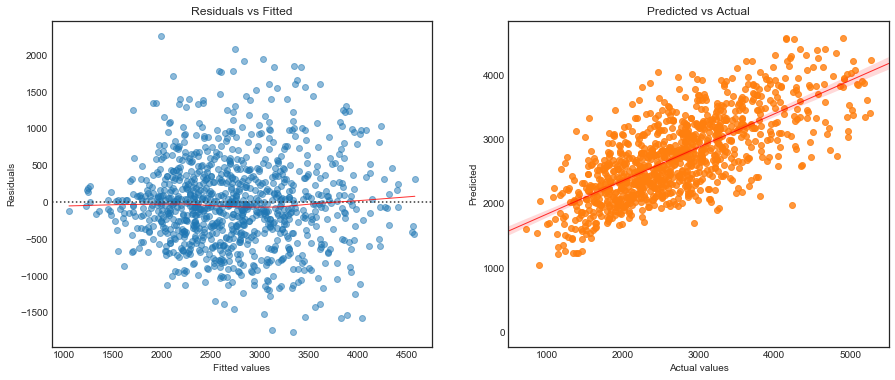

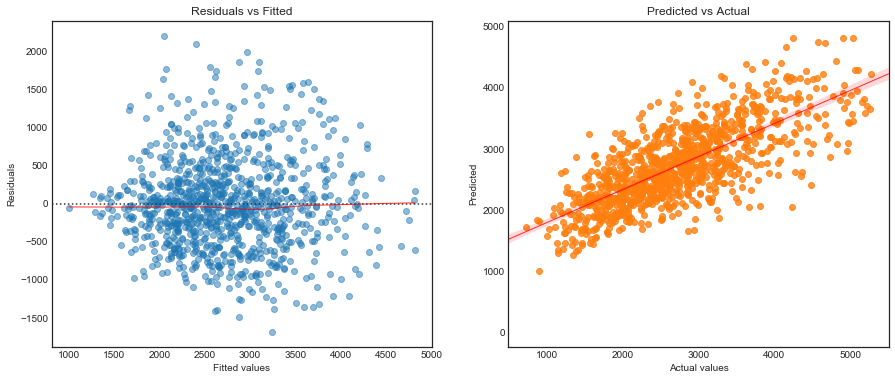

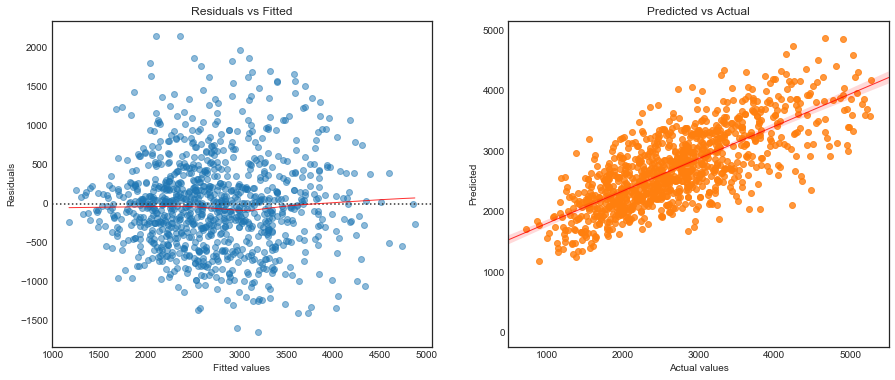

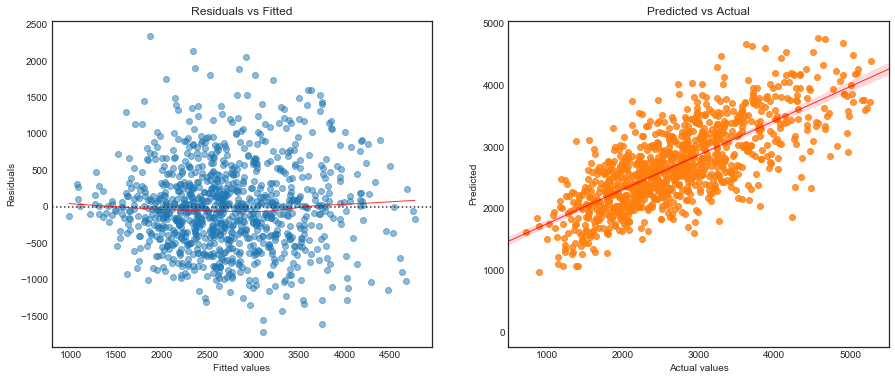

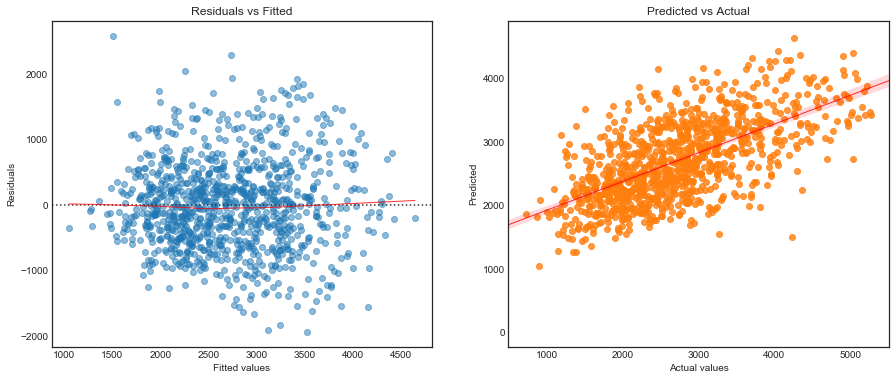

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
# TODO: Initialize the three models
clf_A =  RandomForestRegressor(random_state=40,n_jobs=-1)
clf_B = GradientBoostingRegressor(random_state=40)
clf_C = XGBRegressor(random_state=40,n_jobs=-1)
clf_D = LinearRegression(n_jobs=-1)
clf_E = SVR(kernel='linear')
clf_F = KNeighborsRegressor(n_jobs=-1)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D,clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    results[clf_name]=plot_model_test( X_train.drop(["time_to_prepare_order","avg_time_to_prepare_cat_hour","store_id","store_primary_category","total_items"],axis=1), y_train, X_test.drop(["time_to_prepare_order","avg_time_to_prepare_cat_hour","store_id","store_primary_category","total_items"],axis=1), y_test, clf)
results

Variable: avg_time_to_prepare_store_hour Importance: 0.4000000059604645
Variable: estimated_store_to_consumer_driving_duration Importance: 0.10000000149011612
Variable: estimated_order_place_duration Importance: 0.05999999865889549
Variable: subtotal             Importance: 0.05000000074505806
Variable: total_outstanding_orders Importance: 0.05000000074505806
Variable: hour_created         Importance: 0.05000000074505806
Variable: day_week             Importance: 0.03999999910593033
Variable: day                  Importance: 0.03999999910593033
Variable: num_distinct_items   Importance: 0.029999999329447746
Variable: total_onshift_dashers Importance: 0.029999999329447746
Variable: total_busy_dashers   Importance: 0.029999999329447746
Variable: market_id            Importance: 0.019999999552965164
Variable: order_protocol       Importance: 0.019999999552965164
Variable: min_item_price       Importance: 0.019999999552965164
Variable: max_item_price       Importance: 0.019999999552965164


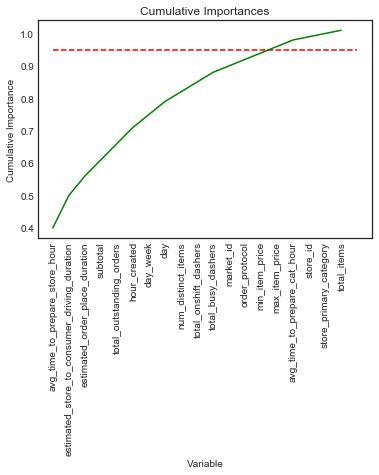

In [111]:
# Get numerical feature importances
importances = list(clf_C.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.drop(["time_to_prepare_order"],axis=1).columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
x_values = list(range(len(importances)))

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

## model tuning

c:\users\prajakta gujarathi\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor
r^2 train: 0.8052501310880686
r^2 test: 0.5565103468886057
mean Sqr error: 345347.70199889666
mean Absolute error: 446.5844482849121
rmse 587.6629152829848
nomalized rmse 21.470984803377558
% More than 5 min late or early:  59.03
% More than 10 min late or early:  26.240000000000002



{'XGBRegressor': XGBRegressor(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bytree=1, gamma=0.1,
              importance_type='gain', learning_rate=0.1, max_delta_step=0,
              max_depth=10, max_features='auto', max_samples=1,
              min_child_weight=1, min_samples_leaf=1, min_samples_split=2,
              missing=None, n_estimators=178, n_jobs=-1, nthread=None,
              objective='reg:linear', random_state=40, reg_alpha=1e-05,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)}

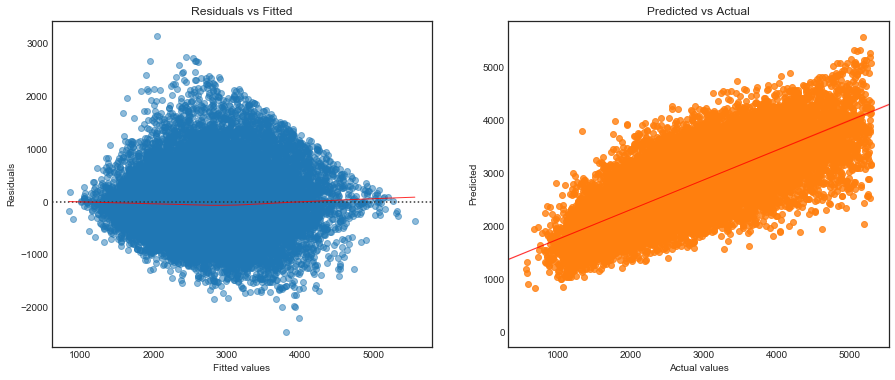

In [56]:
#  Focusing on XGBRegressor and GradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
# TODO: Initialize the three models

clf_C = XGBRegressor(random_state=40,n_jobs=-1,base_score=0.5, booster='gbtree', bootstrap=True,
             colsample_bylevel=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, max_features='auto', max_samples=1,
             min_child_weight=1, min_samples_leaf=1, min_samples_split=2,
             missing=None, n_estimators=178,  nthread=None,
             objective='reg:linear',  reg_alpha=1e-05,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)



# Collect results on the learners
results = {}
for clf in [ clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    results[clf_name]=plot_model_test( X_train.drop(["time_to_prepare_order","avg_time_to_prepare_cat_hour","store_id","store_primary_category","total_items"],axis=1), y_train, X_test.drop(["time_to_prepare_order","avg_time_to_prepare_cat_hour","store_id","store_primary_category","total_items"],axis=1), y_test, clf)
results

In [63]:
import pickle
pickle.dump(clf_C, open("total_delivery_estimate.sav","wb"))

In [39]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
max_samples = [1,None, 0.5]
# Create the random grid
random_grid = {'n_estimators': [178],
               'max_features': ['auto'],
               'max_depth': [10],
               'min_samples_split': [2],
               'min_samples_leaf': [1],
               'bootstrap': [True],
              'max_samples':[1],
               'gamma':[0.1],#[i/10.0 for i in range(0,5)],
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
              }
print(random_grid)

{'n_estimators': [178], 'max_features': ['auto'], 'max_depth': [10], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [True], 'max_samples': [1], 'gamma': [0.1], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]}


In [40]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = XGBRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train.drop(["time_to_prepare_order","avg_time_to_prepare_cat_hour","store_id","store_primary_category","total_items"],axis=1), y_train)

c:\users\prajakta gujarathi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.6s finished
c:\users\prajakta gujarathi\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scal...
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True], 'gamma': [0.1],
                                        'max_depth

In [41]:
rf_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', bootstrap=True,
             colsample_bylevel=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, max_features='auto', max_samples=1,
             min_child_weight=1, min_samples_leaf=1, min_samples_split=2,
             missing=None, n_estimators=178, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=0, reg_alpha=1e-05,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)